In [1]:
"""
Purpose: To decompose the multi-somas for splitting
using the new decomposition method



"""

'\nPurpose: To decompose the multi-somas for splitting\nusing the new decomposition method\n\n\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-27 16:36:15,806 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-27 16:36:15,807 - settings - Setting database.user to celiib
INFO - 2021-01-27 16:36:15,808 - settings - Setting database.password to newceliipass
INFO - 2021-01-27 16:36:15,812 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-27 16:36:15,813 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-27 16:36:15,825 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-27 16:36:16,087 - settings - Setting enable_python_native_blobs to True


In [3]:
#so that it will have the adapter defined
from datajoint_utils import *

In [4]:
test_mode = True

# Debugging the contains method

In [5]:
import system_utils as su

In [6]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 100)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-27 16:36:16,146 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-27 16:36:16,147 - settings - Setting database.user to celiib
INFO - 2021-01-27 16:36:16,148 - settings - Setting database.password to newceliipass
INFO - 2021-01-27 16:36:16,152 - settings - Setting enable_python_native_blobs to True


Sleeping 4 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-27 16:36:16,441 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [7]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [8]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 6962


In [9]:
# minnie.DecompositionSplit.drop()
# schema.external['decomposition'].delete(delete_external_files=True)

In [10]:
# This keysource acounts that you could have more than 1 possible soma but not a significant limb connecting them (no error limbs)
key_source = minnie.Decomposition() & minnie.MultiSomaProofread2().proj() & "n_somas>1 OR n_error_limbs>0"
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135012398582,0,0.25,30.00,4,0,1,=BLOB=,1376990,2794781,0,3,1,3,2,7,332,193,13857599.090995071,7698499.767603829,24782.936,182.056,175.907,512.504,498.037,5073,0.00036608073062934334,15.28012048192771,9021770.899,184,0.0005623064536655776,27.571,1130755898564.6187,149139625.2549947,81598.25458505328,125336.35704382107,6145412492.199015,18888.6673
864691135012571126,0,0.25,30.00,4,0,1,=BLOB=,1405952,2834699,0,5,5,0,1,9,438,190,15005335.104019193,5950109.147626077,22518.656,140.086,140.086,469.827,405.969,5271,0.000351275060734109,12.034246575342467,9075502.16,228,0.0005807943083559357,23.118,1169557046930.9404,149701410.7930819,77942.74761765724,128869.67864827663,5129636170.749739,18283.2209
864691135065018692,0,0.25,30.00,4,0,1,=BLOB=,927599,1896021,0,2,2,1,2,19,275,62,10134692.441118384,2065744.7931319945,17371.879,110.248,110.248,544.807,544.758,1859,0.0001834293453699376,6.76,5876271.812,132,0.00031635704737206256,14.083,333744826425.14685,116071713.89832559,32930.92793532444,56795.33505301828,2528369897.1602035,13467.9901
864691135065032772,0,0.25,30.00,4,0,1,=BLOB=,1284918,2610256,0,1,0,1,3,19,339,49,12070580.98087547,2067456.6676802342,24476.944,293.07,258.608,496.883,455.767,4680,0.00038771953126489554,13.805309734513274,9141427.307,231,0.0005119550637805012,20.26,984274848135.3904,134477821.95931625,81543.28691343585,107671.90013989249,4260930078.5081835,10872.3472
864691135341171909,0,0.25,30.00,4,0,1,=BLOB=,822316,1638121,0,2,2,0,1,11,199,68,9450347.657808917,3250054.207938929,29478.786,237.546,234.385,470.636,441.647,2045,0.00021639415543725485,10.27638190954774,7043457.152,132,0.00029034037630502505,15.492,324097367203.97284,96991868.0799891,34294.75601737974,46013.961639838315,2455283084.878582,3309.9726
864691135345134239,0,0.25,30.00,4,0,1,=BLOB=,1300713,2608916,0,1,1,0,1,7,240,90,8832184.414140496,2928317.149123956,24303.97,272

In [11]:
import numpy as np
import time
import proofreading_utils as pru

max_n_somas=8

verbose = True

@schema
class DecompositionSplit(dj.Computed):
    definition="""
    -> minnie.Decomposition()
    split_index: tinyint unsigned  #the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM
    ---
    multiplicity=null    : tinyint unsigned             # the number of somas found for this base segment
    n_splits             : int unsigned                 # the number of cuts required to help split the neuron
    split_success        : tinyint unsigned             # the successfulness of the splitting
    n_limbs_cancelled    : tinyint unsigned             # the number of limbs cancelled out in order to split the soma because no split found
    split_results: longblob #will store the results of how to split the limbs of neuron objects from original neuron
    decomposition: <decomposition>
    n_vertices           : int unsigned                 # number of vertices
    n_faces              : int unsigned                 # number of faces
    n_not_processed_soma_containing_meshes : int unsigned  #the number of meshes with somas that were not processed
    n_error_limbs: int #the number of limbs that are touching multiple somas or 1 soma in multiple places
    n_same_soma_multi_touching_limbs: int # number of limbs that touch the same soma multiple times
    n_multi_soma_touching_limbs: int # number of limbs that touch multiple somas
    n_somas: int #number of soma meshes detected
    max_soma_n_faces:  int unsigned                 # The largest number of faces of the somas
    max_soma_volume:  int unsigned                 # The largest volume of the somas the (volume in billions (10*9 nm^3))
    n_limbs: int
    n_branches: int
    max_limb_n_branches=NULL:int
    
    skeletal_length=NULL: double
    max_limb_skeletal_length=NULL:double
    median_branch_length=NULL:double #gives information on average skeletal length to next branch point
    
    
    width_median=NULL: double #median width from mesh center without spines removed
    width_no_spine_median=NULL: double #median width from mesh center with spines removed
    width_90_perc=NULL: double # 90th percentile for width without spines removed
    width_no_spine_90_perc=NULL: double  # 90th percentile for width with spines removed
    
    
    n_spines: bigint

    spine_density=NULL: double # n_spines/ skeletal_length
    spines_per_branch=NULL: double
    
    skeletal_length_eligible=NULL: double # the skeletal length for all branches searched for spines
    n_spine_eligible_branches=NULL: int # the number of branches that were checked for spines because passed width threshold
    
    spine_density_eligible=NULL:double # n_spines/skeletal_length_eligible
    spines_per_branch_eligible=NULL:double # n_spines/n_spine_eligible_branches
    
    total_spine_volume=NULL: double # the sum of all spine volume
    spine_volume_median=NULL: double # median of the spine volume for those spines with able to calculate volume
    spine_volume_density=NULL: double #total_spine_volume/skeletal_length
    spine_volume_density_eligible=NULL: double #total_spine_volume/skeletal_length_eligible
    spine_volume_per_branch_eligible=NULL: double #total_spine_volume/n_spine_eligible_branches
    
    run_time=NULL : double                   # the amount of time to run (seconds)

    
    """
                             
    
    ''' Old keysource used for inhibitory excitatory check
    classified_table = (minnie.BaylorManualCellType() &
                        'nucleus_version=3' & 
                        "(cell_type = 'excitatory') or  (cell_type = 'inhibitory')")
    
    key_source = ((minnie.Decomposition & 
                (minnie.NeuronSplitSuggestions.proj()) & 
                (classified_table.proj()) 
                & f"n_somas<{max_n_somas}" & "n_error_limbs>0"))'''
    
    # This keysource acounts that you could have more than 1 possible soma but not a significant limb connecting them (no error limbs)
    key_source = minnie.Decomposition() & minnie.MultiSomaProofread2().proj() & "n_somas>1 OR n_error_limbs>0"

    

    def make(self,key):
        """
        Pseudocode for process:

        1) Get the segment id from the key
        2) Get the decomposed neurong object from Decomposition table
        3) Run the multi_soma split suggestions algorithm
        4) Get the number of splits required for this neuron
        5) Split the neuron into a list of neuron objects
        6) For each neuron object in the list:
        - get the number of errored limbs (to indicate the success type)
        - Change the description to include the multiplicity
        - Compute the information on the largest soma faces and volume
        - Save the neuron object to the external
        - Add the new write key to a list to commit 
        7) Write all of the keys 
        """
        
        whole_pass_time = time.time()
        
        
        
        # 1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n\n---- Working on Neuron {key['segment_id']} ----")
        
        
        # 2) Get the decomposed neuron object from Decomposition table and the split suggestions
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        """ Old way that downloaded from another table
        # 3) Retrieve the multi soma suggestions
        split_results = (minnie.NeuronSplitSuggestions & key).fetch1("split_results")
        """
        #3) Calculated the split results
        split_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        # 4) Get the number of splits required for this neuron
        n_paths_cut = pru.get_n_paths_cut(split_results)

        if verbose:
            print(f"n_paths_cut = {n_paths_cut}")
            
            
        # 5) Split the neuron into a list of neuron objects
        neuron_list,neuron_obj_errored_limbs = pru.split_neuron(neuron_obj,
                        limb_results=split_results,
                                       verbose=verbose
                                            )
        
        if verbose:
            print(f"Number of neurons: {len(neuron_list)}")
        
        neuron_entries = []
        for neuron_idx in range(len(neuron_list)):
            
            """
            # 6) For each neuron object in the list:
            # - get the number of errored limbs (to indicate the success type)
            # - Compute the information on the largest soma faces and volume
            # - Save the neuron object to the external
            # - Add the new write key to a list to commit 
            """
            n = neuron_list[neuron_idx]
            n_limbs_cancelled = neuron_obj_errored_limbs[neuron_idx]
            #for n in neuron_list:
            #     nviz.visualize_neuron(n,
            #                          limb_branch_dict="all")

            # - get the number of errored limbs (to indicate the success type)
            if n.n_error_limbs == 0:
                split_success = 0
            elif n.multi_soma_touching_limbs == 0:
                split_successs = 1
            elif n.same_soma_multi_touching_limbs == 0:
                split_success = 2
            else:
                split_success = 3

            if verbose:
                print(f"split_success = {split_success}")

            # - Compute the information on the largest soma faces and volume
            soma_volumes = [n[k].volume/1000000000 for k in n.get_soma_node_names()] 
            soma_n_faces = [len(n[k].mesh.faces) for k in n.get_soma_node_names()] 

            largest_n_faces = np.max(soma_n_faces)
            largest_volume = np.max(soma_volumes)

            if verbose:
                print(f"largest_n_faces = {largest_n_faces}")
                print(f"largest_volume = {largest_volume}")


            #6) Save the file in a certain location
            if True:
                save_time = time.time()
                ret_file_path = n.save_compressed_neuron(output_folder=str(du.get_decomposition_path()),
                                                  return_file_path=True,
                                                 export_mesh=False,
                                                 suppress_output=True)

                ret_file_path_str = str(ret_file_path.absolute()) + ".pbz2"
                print(f"Save time = {time.time() - save_time}")
            else:
                ret_file_path_str = "dummy_holder"



            #7) Pass stats and file location to insert
            new_key = dict(key,
                           split_index = neuron_idx,
                           multiplicity=len(neuron_list),

                           n_splits = n_paths_cut,
                           split_success = split_success,
                           n_limbs_cancelled=n_limbs_cancelled,
                           split_results=split_results,

                           max_soma_n_faces = largest_n_faces,
                           max_soma_volume = largest_volume,


                           decomposition=ret_file_path_str,
                           n_vertices=len(n.mesh.vertices),
                           n_faces=len(n.mesh.faces),
                           run_time=np.round(time.time() - whole_pass_time,4)
                          )

            stats_dict = n.neuron_stats()
            new_key.update(stats_dict)


            neuron_entries.append(new_key)

        
        self.insert(neuron_entries, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [15]:
curr_table = (minnie.schema.jobs & "table_name='__decomposition_split'")
(curr_table)#.delete()# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

INFO - 2021-01-27 16:36:16,624 - autopopulate - Found 43 keys to populate
INFO - 2021-01-27 16:36:16,633 - connection - Transaction started
INFO - 2021-01-27 16:36:16,635 - autopopulate - Populating: {'segment_id': 864691135012398582, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('30.00'), 'process_version': 4, 'index': 0}


Populate Started



---- Working on Neuron 864691135012398582 ----
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0 1 2]
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[124 126]
 [124 136]
 [124 147]
 [124 162]
 [124 163]
 [124 168]
 [124 173]
 [124 178]
 [126 136]
 [126 147]
 [126 162]
 [126 163]
 [126 168]
 [126 173]
 [126 178]
 [136 147]
 [136 162]
 [136 163]
 [136 168]
 [136 173]
 [136 178]
 [147 162]
 [147 163]
 [147 168]
 [147 173]
 [147 178]
 [162 163]
 [162 168]
 [162 173]
 [162 178]
 [163 168]
 [163 173]
 [163 178]
 [168 173]
 [168 178]
 [173 178]]


---- working on disconnecting 124 and 126
---- This disconnects S0_0 from S1_1  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [124, 113, 114, 116, 125, 126]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_

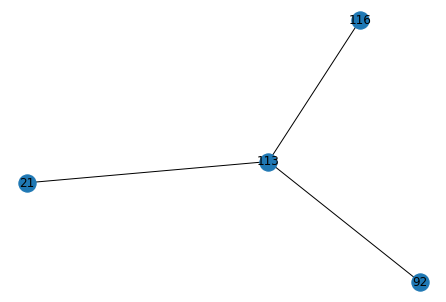

match_branches = [[92, 113]]
edges_to_delete (resolve crossover) = [[21, 92], [21, 113], [21, 116], [92, 116], [113, 116]]
edges_to_create (resolve crossover) = [[92, 113]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1018680.  697371.  875982.] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [112, 116, 126, 127]
112 = red
116 = aqua
126 = purple
127 = green
Angle between 112 and 116 = 125.73 
Angle between 112 and 126 = 30.09 
Angle between 112 and 127 = 114.87 
Angle between 116 and 126 = 62.92 
Angle between 116 and 127 = 96.37 
Angle between 126 and 127 = 35.12 
Final Matches = [[112, 126]]
matched_branches_revised = [[112, 126]]
Original graph


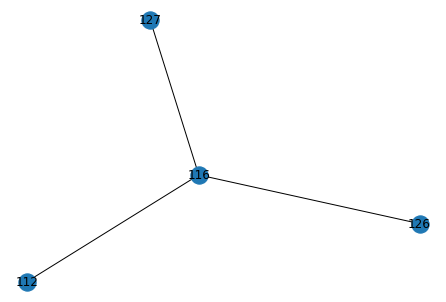

match_branches = [[112, 126]]
edges_to_delete (resolve crossover) = [[112, 116], [112, 127], [116, 126], [116, 127], [126, 127]]
edges_to_create (resolve crossover) = [[112, 126]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [124 113]: curr_angle = 43.58
  Edge: [113 116]: curr_angle = 79.05
  Edge: [116 126]: curr_angle = 60.16

Total time for doubling_back = 0.09977030754089355

Attempting the width jump check (ARTIFICIALLY ATTEMPTING FROM BOTH SIDES)
width_jump_threshold = 200
  Edge: [124 113]: jump = -154.12
  Edge: [113 116]: jump = -149.52
  Edge: [116 126]: jump = 411.68
Adding error edge [116 126] because width jump was 411.68137783189354
Total time for width = 0.07422995567321777
first_error_sizes = [411.68137783189354, -inf], first_error_locations = [2, inf], winning_path = 0
***inside resolve crossover!!!!****
coordinate_branches = [112, 116, 126, 127]
112 = red
116 = aqua
126 = purple
127 = green
Angle between 112 and 116 = 112.3 
Angle between 112 and 126 = 44.43 
Angle between 112 and 127 = 95.24 
Angle between 116 and 126 = 46.78 
Angle between 116 and 127 = 110.97 
Angle between 126 and 127 = 43.64 
Final Matches = []
matched_branches_revised = []
Original graph


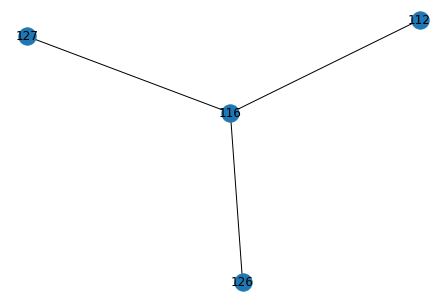

match_branches = []
edges_to_delete (resolve crossover) = [[112, 116], [112, 126], [112, 127], [116, 126], [116, 127], [126, 127]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 109, 110, 111, 112, 113, 115, 116, 119, 120, 121, 122, 123, 124, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 

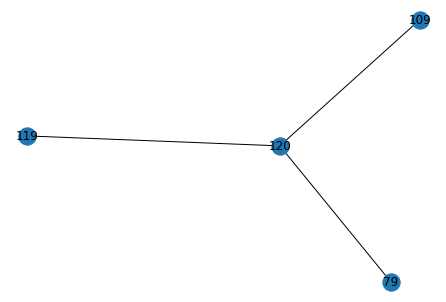

match_branches = [[79, 119], [109, 120]]
edges_to_delete (resolve crossover) = [[79, 109], [79, 120], [109, 119], [119, 120]]
edges_to_create (resolve crossover) = [[79, 119], [109, 120]]
curr_limb.deleted_edges 5 =[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127])]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [124 120]: curr_angle = 52.47
  Edge: [120 119]: curr_angle = 161.96
  Edge: [119 136]: curr_angle = 108.79

Total time for doubling_back = 0.11901974678039551
There were 2 edges that passed doubling back threshold of 80
Winning edge [120 119] had a doubling back of 161.95953369701758
***inside resolve crossover!!!!****
coordinate_branches = [79, 109, 119, 120]
79 = red
109 = aqua
119 = purple
120 = green
Angle between 79 and 109 = 115.91 
Angle between 79 and 119 = 8.13 
Angle between 79 and 120 = 47.51 
Angle between 109 and 119 = 60.17 
Angle between 109 and 120 = 17.83 
Angle between 119 and 120 = 137.21 
Final Matches = [[79, 119], [109, 120]]
matched_branches_revised = [[79, 119], [109, 120]]
Original graph


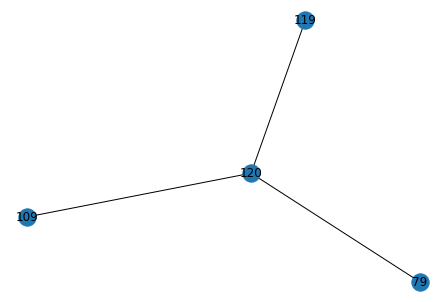

match_branches = [[79, 119], [109, 120]]
edges_to_delete (resolve crossover) = [[79, 109], [79, 120], [109, 119], [119, 120]]
edges_to_create (resolve crossover) = [[79, 119], [109, 120]]
edges_to_delete (cut_limb_network) = [array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120])]
edges_to_create = [[79, 119], [109, 120]]
Number of connected components = 6
Comp 0 = {131, 142, 143, 144, 17, 145, 19, 148, 21, 149, 23, 152, 25, 24, 22, 156, 28, 31, 32, 161, 33, 163, 34, 165, 166, 39, 168, 169, 40, 42, 44, 41, 45, 38, 48, 49, 50, 51, 52, 53, 54, 55, 56, 35, 58, 59, 37, 61, 62, 36, 64, 68, 71, 77, 81, 85, 86, 87, 43, 92, 96, 97, 98, 46, 106, 107, 109, 47, 113, 115, 116, 120, 124}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 26, 27, 29, 30, 57, 60, 63, 65, 66, 67, 69, 70, 72, 73, 74, 75, 76, 78, 79, 80, 82, 83, 84, 88, 89, 90, 91, 93, 94, 95, 99, 100, 101, 102, 104, 105, 110, 111, 112, 119, 121, 122, 123, 128, 129, 130, 132, 133, 134, 135, 1

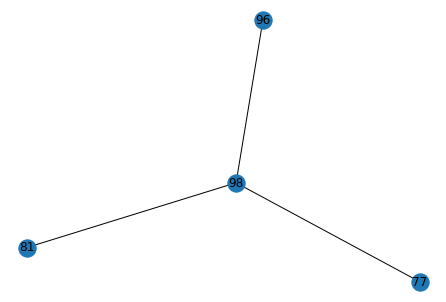

match_branches = [[81, 98]]
edges_to_delete (resolve crossover) = [[77, 81], [77, 96], [77, 98], [81, 96], [96, 98]]
edges_to_create (resolve crossover) = [[81, 98]]
curr_limb.deleted_edges 5 =[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127]), array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1013840.   706571.   855881.5] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127]), array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120])]
***inside resolve crossover!!!!****
coordinate_branches = [79, 109, 119, 120]
79 = red
109 = aqua
119 = purple
120 = green
Angle between 79 and 109 = 133.2 
Angle between 79 and 119 = 18.16 
Angle between 79 and 120 = 19.03 
Angle between 109 and 119

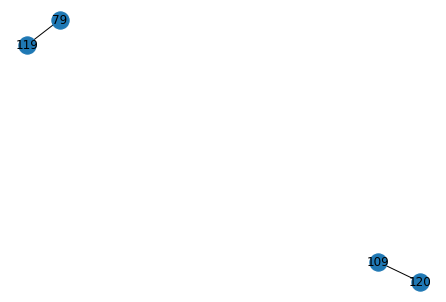

match_branches = [[79, 119], [109, 120]]
edges_to_delete (resolve crossover) = [[79, 109], [79, 120], [109, 119], [119, 120]]
edges_to_create (resolve crossover) = [[79, 119], [109, 120]]
curr_limb.deleted_edges 5 =[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127]), array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1028886.11111111  703146.11111111  855135.94444444] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127]), array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120])]
***inside resolve crossover!!!!****
coordinate_branches = [96, 161, 163, 168, 169]
96 = red
161 = aqua
163 = purple
168 = green
Angle between 96 and 161 = 135.9 
Angle between 96 and 163 = 83.0 
Angle betwee

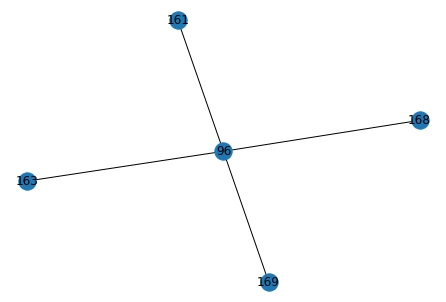

match_branches = [[161, 168]]
edges_to_delete (resolve crossover) = [[96, 161], [96, 163], [96, 168], [96, 169], [161, 163], [161, 169], [163, 168], [163, 169], [168, 169]]
edges_to_create (resolve crossover) = [[161, 168]]
curr_limb.deleted_edges 5 =[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127]), array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120])]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [124 120]: curr_angle = 52.47
  Edge: [120 109]: curr_angle = 40.03
  Edge: [109  98]: curr_angle = 16.03
  Edge: [98 96]: curr_angle = 162.74
  Edge: [ 96 163]: curr_angle = 77.59

Total time for doubling_back = 0.2578432559967041
There were 1 edges that passed doubling back threshold of 80
Winning edge [98 96] had a doubling back of 162.7354536227431
***inside resolve crossover!!!!****
coordinate_branches = [77, 81, 96, 98]
77 = red
81 = aqua
96 = purple
98 = green
Angle between 77 and 81 = 93.8 
Angle between 77 and 96 = 66.4 
Angle between 77 and 98 = 59.31 
Angle between 81 and 96 = 20.96 
Angle between 81 and 98 = 31.99 
Angle between 96 and 98 = 167.75 
Final Matches = [[81, 96], [81, 98]]
matched_branches_revised = [[81, 96]]
Original graph


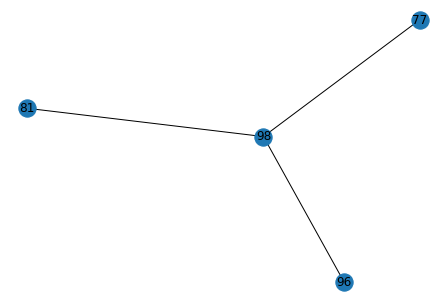

match_branches = [[81, 96]]
edges_to_delete (resolve crossover) = [[77, 81], [77, 96], [77, 98], [81, 98], [96, 98]]
edges_to_create (resolve crossover) = [[81, 96]]
edges_to_delete (cut_limb_network) = [array([77, 81]), array([77, 96]), array([77, 98]), array([81, 98]), array([96, 98])]
edges_to_create = [[81, 96]]
Number of connected components = 10
Comp 0 = {17, 19, 21, 22, 23, 24, 25, 28, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 61, 62, 64, 68, 71, 85, 86, 87, 92, 98, 109, 113, 116, 120, 124}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 26, 27, 29, 30, 57, 60, 63, 65, 66, 67, 69, 70, 72, 73, 74, 75, 76, 78, 79, 80, 82, 83, 84, 88, 89, 90, 91, 93, 94, 95, 99, 100, 101, 102, 104, 105, 110, 111, 112, 119, 121, 122, 123, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 146, 147, 150, 151, 153, 154, 155, 157, 158, 159, 160, 162, 164, 167, 170, 171, 172, 173, 174, 175, 176, 177, 178,

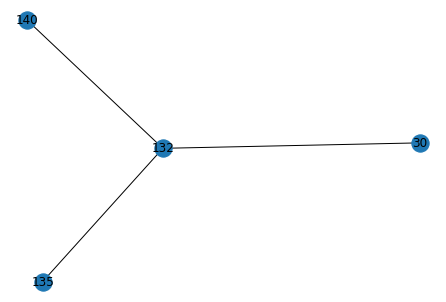

match_branches = [[30, 140]]
edges_to_delete (resolve crossover) = [[30, 132], [30, 135], [132, 135], [132, 140], [135, 140]]
edges_to_create (resolve crossover) = [[30, 140]]
curr_limb.deleted_edges 5 =[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127]), array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120]), array([77, 81]), array([77, 96]), array([77, 98]), array([81, 98]), array([96, 98])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 147 because skeletal distance was 1101.8602537723332 and threshold was 2500
skip_nodes = [147]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [136 132]: curr_angle = 52.06
  Edge: [132 135]: curr_angle = 46.5
  Edge: [135 101]: curr_angle = 56.08
  Edge: [101 100]: curr_angle = 98.61
  Edge: [100  99]: curr_angle = 152.87
  Edge: [ 99 121]: curr_angle = 51.65
  Edge: [121 141]: curr_angle = 75.76

Total time for doubling_back = 0.38026857376098633
There were 2 edges that passed doubling back threshold of 80
Winning edge [100  99] had a doubling back of 152.87469723521548
***inside resolve crossover!!!!****
coordinate_branches = [90, 99, 100]
90 = red
99 = aqua
100 = purple
Angle between 90 and 99 = 4.2 
Angle between 90 and 100 = 96.35 
Angle between 99 and 100 = 87.84 
Final Matches = [[90, 99]]
matched_branches_revised = [[90, 99]]
Original graph


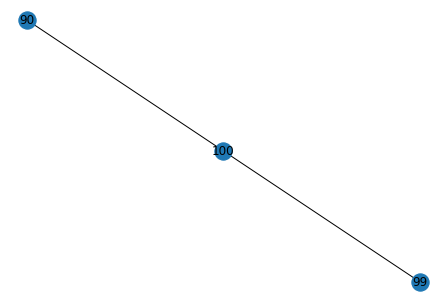

match_branches = [[90, 99]]
edges_to_delete (resolve crossover) = [[90, 100], [99, 100]]
edges_to_create (resolve crossover) = [[90, 99]]
edges_to_delete (cut_limb_network) = [array([ 90, 100]), array([ 99, 100])]
edges_to_create = [[90, 99]]
Number of connected components = 12
Comp 0 = {17, 19, 21, 22, 23, 24, 25, 28, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 61, 62, 64, 68, 71, 85, 86, 87, 92, 98, 109, 113, 116, 120, 124}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 26, 27, 29, 30, 63, 67, 69, 72, 73, 75, 76, 79, 80, 82, 83, 84, 88, 93, 94, 100, 101, 105, 110, 119, 122, 123, 128, 129, 130, 132, 133, 134, 135, 136, 137, 139, 140, 150, 151, 153, 154, 155, 157, 158, 159, 160, 162, 164, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 185, 188, 189, 190, 191, 192}
Comp 2 = {141, 146, 147, 167, 183, 184, 57, 186, 187, 60, 65, 66, 70, 74, 78, 89, 90, 91, 95, 99, 102, 104, 111, 112, 121}

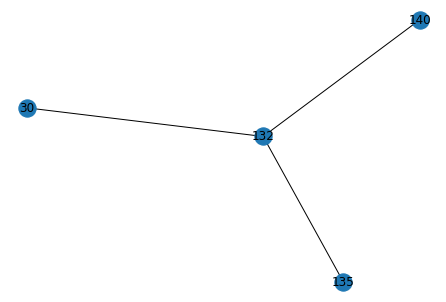

match_branches = [[30, 140]]
edges_to_delete (resolve crossover) = [[30, 132], [30, 135], [132, 135], [132, 140], [135, 140]]
edges_to_create (resolve crossover) = [[30, 140]]
curr_limb.deleted_edges 5 =[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127]), array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120]), array([77, 81]), array([77, 96]), array([77, 98]), array([81, 98]), array([96, 98]), array([ 90, 100]), array([ 99, 100])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1028190.   690925.   842093.5] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127]), array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120]), array([77, 81]), array([77, 96]), array([77, 98]), array([81, 98]), array([96, 98]), array([ 90, 100]), array([ 99, 1

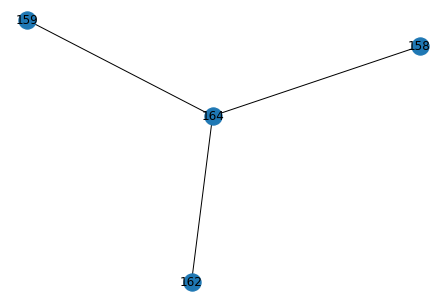

match_branches = [[158, 164]]
edges_to_delete (resolve crossover) = [[158, 159], [158, 162], [159, 162], [159, 164], [162, 164]]
edges_to_create (resolve crossover) = [[158, 164]]
curr_limb.deleted_edges 5 =[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127]), array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120]), array([77, 81]), array([77, 96]), array([77, 98]), array([81, 98]), array([96, 98]), array([ 90, 100]), array([ 99, 100])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 162 because skeletal distance was 756.9905741766252 and threshold was 2500
skip_nodes = [162]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [136 132]: curr_angle = 52.06
  Edge: [132 140]: curr_angle = 97.66
  Edge: [140 174]: curr_angle = 88.64
  Edge: [174 164]: curr_angle = 103.02

Total time for doubling_back = 0.1316366195678711
There were 3 edges that passed doubling back threshold of 80
Winning edge [174 164] had a doubling back of 103.01811190770488
***inside resolve crossover!!!!****
coordinate_branches = [164, 174, 175]
164 = red
174 = aqua
175 = purple
Angle between 164 and 174 = 67.44 
Angle between 164 and 175 = 65.67 
Angle between 174 and 175 = 47.66 
Final Matches = []
matched_branches_revised = []
Original graph


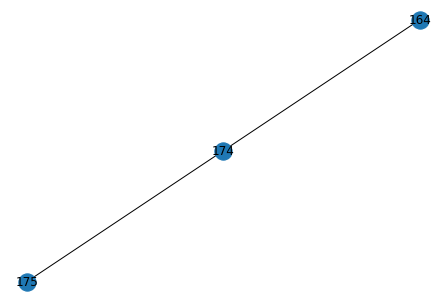

match_branches = []
edges_to_delete (resolve crossover) = [[164, 174], [164, 175], [174, 175]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([164, 174]), array([164, 175]), array([174, 175])]
edges_to_create = []
Number of connected components = 15
Comp 0 = {17, 19, 21, 22, 23, 24, 25, 28, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 61, 62, 64, 68, 71, 85, 86, 87, 92, 98, 109, 113, 116, 120, 124}
Comp 1 = {128, 129, 132, 135, 136, 139, 140, 153, 30, 173, 174, 178, 180, 181, 182, 63, 192, 191, 79, 100, 101, 119, 123}
Comp 2 = {141, 146, 147, 167, 183, 184, 57, 186, 187, 60, 65, 66, 70, 74, 78, 89, 90, 91, 95, 99, 102, 104, 111, 112, 121}
Comp 3 = {126}
Comp 4 = {103, 108, 117, 118, 127}
Comp 5 = {77}
Comp 6 = {131, 142, 143, 144, 145, 148, 149, 152, 156, 161, 163, 166, 39, 168, 169, 58, 59, 81, 96, 106, 107, 115}
Comp 7 = {0, 1, 130, 2, 3, 133, 134, 7, 4, 137, 9, 11, 10, 13, 14, 15, 16, 8, 18,

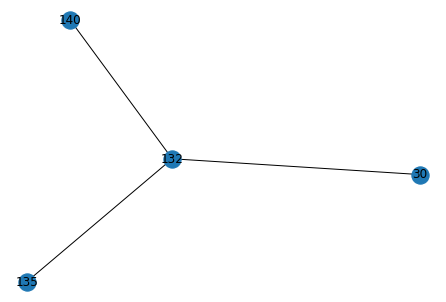

match_branches = [[30, 140]]
edges_to_delete (resolve crossover) = [[30, 132], [30, 135], [132, 135], [132, 140], [135, 140]]
edges_to_create (resolve crossover) = [[30, 140]]
curr_limb.deleted_edges 5 =[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127]), array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120]), array([77, 81]), array([77, 96]), array([77, 98]), array([81, 98]), array([96, 98]), array([ 90, 100]), array([ 99, 100]), array([164, 174]), array([164, 175]), array([174, 175])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 173 because skeletal distance was 676.3623903587136 and threshold was 2500
skip_nodes = [173]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [136 132]: curr_angle = 52.06
  Edge: [132 140]: curr_angle = 97.66

Total time for doubling_back = 0.06920838356018066
There were 1 edges that passed doubling back threshold of 80
Winning edge [132 140] had a doubling back of 97.66157948733486
***inside resolve crossover!!!!****
coordinate_branches = [30, 132, 135, 140]
30 = red
132 = aqua
135 = purple
140 = green
Angle between 30 and 132 = 116.85 
Angle between 30 and 135 = 116.92 
Angle between 30 and 140 = 11.42 
Angle between 132 and 135 = 81.52 
Angle between 132 and 140 = 58.53 
Angle between 135 and 140 = 56.63 
Final Matches = [[30, 140]]
matched_branches_revised = [[30, 140]]
Original graph


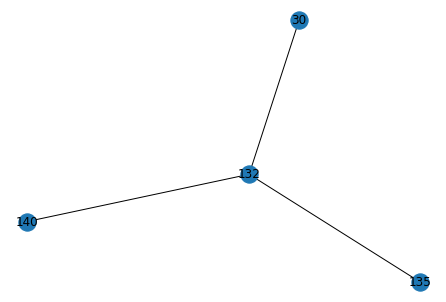

match_branches = [[30, 140]]
edges_to_delete (resolve crossover) = [[30, 132], [30, 135], [132, 135], [132, 140], [135, 140]]
edges_to_create (resolve crossover) = [[30, 140]]
edges_to_delete (cut_limb_network) = [array([ 30, 132]), array([ 30, 135]), array([132, 135]), array([132, 140]), array([135, 140])]
edges_to_create = [[30, 140]]
Number of connected components = 17
Comp 0 = {17, 19, 21, 22, 23, 24, 25, 28, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 61, 62, 64, 68, 71, 85, 86, 87, 92, 98, 109, 113, 116, 120, 124}
Comp 1 = {136, 132, 119, 79}
Comp 2 = {141, 146, 147, 167, 183, 184, 57, 186, 187, 60, 65, 66, 70, 74, 78, 89, 90, 91, 95, 99, 102, 104, 111, 112, 121}
Comp 3 = {126}
Comp 4 = {103, 108, 117, 118, 127}
Comp 5 = {77}
Comp 6 = {131, 142, 143, 144, 145, 148, 149, 152, 156, 161, 163, 166, 39, 168, 169, 58, 59, 81, 96, 106, 107, 115}
Comp 7 = {174, 140, 173, 30}
Comp 8 = {128, 129, 192, 191, 100, 101, 135, 139, 178, 180

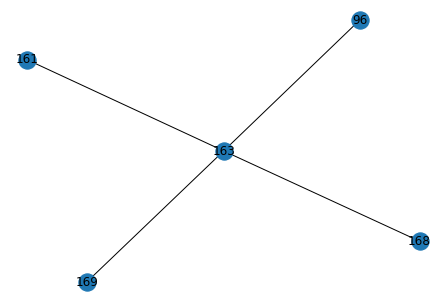

match_branches = [[161, 168]]
edges_to_delete (resolve crossover) = [[96, 161], [96, 163], [96, 168], [96, 169], [161, 163], [161, 169], [163, 168], [163, 169], [168, 169]]
edges_to_create (resolve crossover) = [[161, 168]]
curr_limb.deleted_edges 5 =[array([112, 116]), array([112, 126]), array([112, 127]), array([116, 126]), array([116, 127]), array([126, 127]), array([ 79, 109]), array([ 79, 120]), array([109, 119]), array([119, 120]), array([77, 81]), array([77, 96]), array([77, 98]), array([81, 98]), array([96, 98]), array([ 90, 100]), array([ 99, 100]), array([164, 174]), array([164, 175]), array([174, 175]), array([ 30, 132]), array([ 30, 135]), array([132, 135]), array([132, 140]), array([135, 140])]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [163 168]: curr_angle = 139.21

Total time for doubling_back = 0.04534554481506348
There were 1 edges that passed doubling back threshold of 80
Winning edge [163 168] had a doubling back of 139.21315129405187
***inside resolve crossover!!!!****
coordinate_branches = [96, 161, 163, 168, 169]
96 = red
161 = aqua
163 = purple
168 = green
Angle between 96 and 161 = 127.47 
Angle between 96 and 163 = 109.04 
Angle between 96 and 168 = 47.58 
Angle between 96 and 169 = 31.08 
Angle between 161 and 163 = 56.94 
Angle between 161 and 168 = 22.79 
Angle between 161 and 169 = 83.45 
Angle between 163 and 168 = 109.91 
Angle between 163 and 169 = 41.14 
Angle between 168 and 169 = 103.05 
Final Matches = [[96, 169], [161, 168]]
matched_branches_revised = [[161, 168], [96, 169]]
Original graph


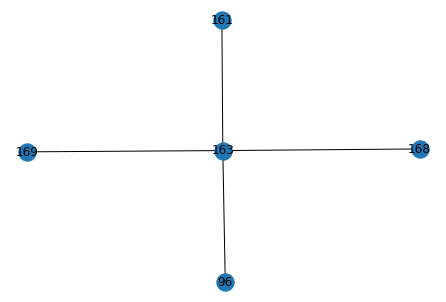

match_branches = [[161, 168], [96, 169]]
edges_to_delete (resolve crossover) = [[96, 161], [96, 163], [96, 168], [161, 163], [161, 169], [163, 168], [163, 169], [168, 169]]
edges_to_create (resolve crossover) = [[161, 168], [96, 169]]
Rejecting creating edge [96, 169] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([ 96, 161]), array([ 96, 163]), array([ 96, 168]), array([161, 163]), array([161, 169]), array([163, 168]), array([163, 169]), array([168, 169])]
edges_to_create = [[161, 168]]
Number of connected components = 20
Comp 0 = {17, 19, 21, 22, 23, 24, 25, 28, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 61, 62, 64, 68, 71, 85, 86, 87, 92, 98, 109, 113, 116, 120, 124}
Comp 1 = {136, 132, 119, 79}
Comp 2 = {141, 146, 147, 167, 183, 184, 57, 186, 187, 60, 65, 66, 70, 74, 78, 89, 90, 91, 95, 99, 102, 104, 111, 112, 121}
Comp 3 = {126}
Comp 4 = {103, 108, 117, 118, 127}
Comp 5 = 

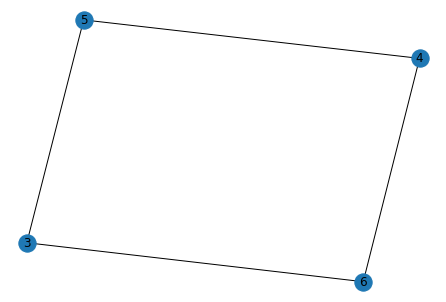

match_branches = []
edges_to_delete (resolve crossover) = [[3, 4], [3, 5], [3, 6], [4, 5], [4, 6], [5, 6]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [1 3]: curr_angle = 9.93
  Edge: [3 6]: curr_angle = 18.92
  Edge: [6 7]: curr_angle = 125.49

Total time for doubling_back = 0.08245348930358887
There were 1 edges that passed doubling back threshold of 80
Winning edge [6 7] had a doubling back of 125.49308815519443
***inside resolve crossover!!!!****
coordinate_branches = [6, 7, 8]
6 = red
7 = aqua
8 = purple
Angle between 6 and 7 = 124.34 
Angle between 6 and 8 = 41.03 
Angle between 7 and 8 = 41.76 
Final Matches = []
matched_branches_revised = []
Original graph


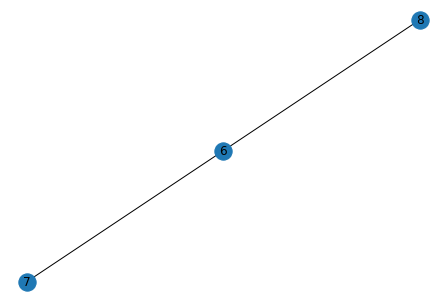

match_branches = []
edges_to_delete (resolve crossover) = [[6, 7], [6, 8], [7, 8]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([6, 7]), array([6, 8]), array([7, 8])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {1, 3, 4.0, 5, 6}
Comp 1 = {7}
Comp 2 = {0, 2, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}
curr_limb_copy.deleted_edges = [array([6, 7]), array([6, 8]), array([7, 8])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([6, 7]), array([6, 8]), array([7, 8])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the sp

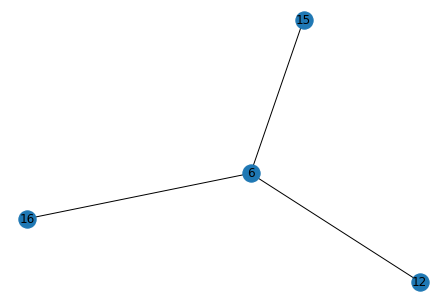

match_branches = [[6, 15]]
edges_to_delete (resolve crossover) = [[6, 12], [6, 16], [12, 15], [12, 16], [15, 16]]
edges_to_create (resolve crossover) = [[6, 15]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 0 because skeletal distance was 377.2707337425478 and threshold was 2500
skip_nodes = [0]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [1 6]: curr_angle = 29.39
  Edge: [ 6 12]: curr_angle = 150.32
  Edge: [12 11]: curr_angle = 23.38
  Edge: [11  3]: curr_angle = 49.63

Total time for doubling_back = 0.47415781021118164
There were 1 edges that passed doubling back threshold of 80
Winning edge [ 6 12] had a doubling back of 150.32417784705322
***inside resolve crossover!!!!****
coordinate_branches = [6, 12, 15, 16]
6 = red
12 = aqua
15 = purple
16 = green
Angle between 6 and 12 = 137.93 
Angle between 6 and 15 = 7.91 
Angle between 6 and 16 = 18.69 
Angle between 12 and 15 = 36.25 
Angle between 12 and 16 = 60.22 
Angle between 15 and 16 = 153.87 
Final Matches = [[6, 15], [6, 16]]
matched_branches_revised = [[6, 15]]
Original graph


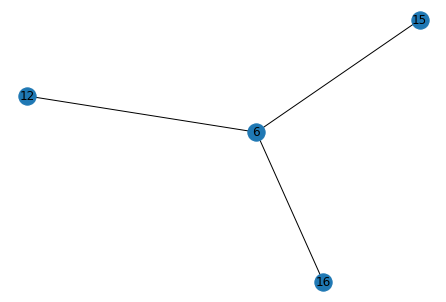

match_branches = [[6, 15]]
edges_to_delete (resolve crossover) = [[6, 12], [6, 16], [12, 15], [12, 16], [15, 16]]
edges_to_create (resolve crossover) = [[6, 15]]
edges_to_delete (cut_limb_network) = [array([ 6, 12]), array([ 6, 16]), array([12, 15]), array([12, 16]), array([15, 16])]
edges_to_create = [[6, 15]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 15, 17, 18}
Comp 1 = {3, 10, 11, 12, 13}
Comp 2 = {16}
Comp 3 = {14}
curr_limb_copy.deleted_edges = [array([ 6, 12]), array([ 6, 16]), array([12, 15]), array([12, 16]), array([15, 16])]
curr_limb_copy.created_edges = [[6, 15]]
After get best cut: cut_edges = [array([ 6, 12]), array([ 6, 16]), array([12, 15]), array([12, 16]), array([15, 16])], added_edges = [[6, 15]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving o

There were 1 duplication nodes found
domination_map = {155: 154}
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [127]
printing out current edge:
[[1022370.  695478.  853171.]
 [1017240.  703208.  857972.]]
edge_endpoints_to_process was empty so exiting loop after 187 iterations
starting_node in concept map (that should match the starting edge) = 122
Total time for branches to concept conversion = 5.574761867523193

Working on adding back the edges that were duplicates
Done generating concept network 




---------Working on soma_idx = 0, soma_group_idx 1, endpt = [1028182.25        691679.675       842034.84583333]---------
Starting_edge inside branches_to_conept = [[1028182.25        691679.675       842034.84583333]
 [1028190.          690925.          842093.5       ]]
There were 1 duplication nodes found
domination_map = {155: 154}
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [144]

There was no starting information so doing to put dummy information and random starting endpoint = [1020714.98360656  681599.88196721  865571.66885246]


---------Working on soma_idx = -1, soma_group_idx -1, endpt = [1020714.98360656  681599.88196721  865571.66885246]---------
Starting_edge inside branches_to_conept = [[1020714.98360656  681599.88196721  865571.66885246]
 [1020720.21810656  681605.11646721  865576.90335246]]
Done generating concept network 


Concept graph size was 1 or less so returning original


----Working on seperate_graph 5----
There was no starting information so doing to put dummy information and random starting endpoint = [1028588.5   690573.4   841332.75]


---------Working on soma_idx = -1, soma_group_idx -1, endpt = [1028588.5   690573.4   841332.75]---------
Starting_edge inside branches_to_conept = [[1028588.5     690573.4     841332.75  ]
 [1028593.7345  690578.6345  841337.9845]]
Done generating concept network 


Concept graph size was 1 or less so ret

--- 3) Finshed generating soma objects and adding them to concept graph: 12.94106388092041
Using already existing limb_mehses_face_idx in preprocessed data 
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7f10eff7c2e8>]}
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7f10deeae860>]}
Concept graph size was 1 or less so returning original
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7f10eff7c320>]}
Concept graph size was 1 or less so returning original
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7f10f0d3df28>]}
--- 4) Finshed generating Limb objects and adding them to concept graph: 2.220905065536499
--- 5) SKIPPING Doing the adaptive mesh correspondence on the meshparty preprocessing ---
--- 6) SKIPPING Using the computed_attribute_dict to populate neuron attributes ---
self.n_limbs = 4
7) Calculating the spines for the neuorn if do not already exist
Found 

In [13]:
import time
import random
pru = reload(pru)
nru = reload(nru)

start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 300))
print('Populate Started')
if not test_mode:
    DecompositionSplit.populate(reserve_jobs=True, suppress_errors=True)
else:
    DecompositionSplit.populate(reserve_jobs=True, suppress_errors=False)
print('Populate Done')

print(f"Total time for DecompositionSplit populate = {time.time() - start_time}")